<a href="https://colab.research.google.com/github/KenyanGeek/Deep-Learning/blob/master/Multi_Layer_Perceptron_Code_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Layer Perceptron on MNIST Database
Created from Scratch to train a model to categorize MNIST data


In [3]:
#import libraries

# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import numpy as np

tcmalloc: large alloc 1073750016 bytes == 0x5921a000 @  0x7efea8f2c2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


# Import the dataset and transformation libraries


In [0]:
from torchvision import datasets
import torchvision.transforms as transforms

In [0]:
#number of workers

num_workers = 1

In [0]:
#how many samples per batch to load
batch_size = 20

In [0]:
#convert the data to torch tensor
transform = transforms.ToTensor()


# Load Training and Test Data


In [8]:
train_data = datasets.MNIST(root='data', train =True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train =False, download=True, transform=transform)

Processing...
Done!


# Prepare Data loaders


In [0]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers)
train_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, num_workers = num_workers)

# Visualize the downloaded data

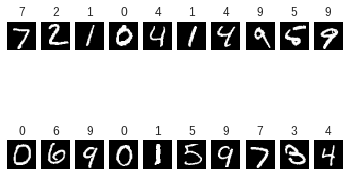

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


#obtain one batch of training images

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

#plot the image in the batch along with corresponding labels

fig = plt.figure()
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
  ax.set_title(str(labels[idx].item()))


# Define the Network Architecture

In [15]:
import torch.nn as nn
import torch.nn.functional as F

#defining the architecture

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      
      #number of hidden nodes in each layer
      
      self.fc1 = nn.Linear(784, 512)
      self.fc2 = nn.Linear(512, 512)
      self.fc3 = nn.Linear(512, 10)
      
      #add a droput layer to prevent overfitting
      
      self.dropout = nn.Dropout(0.2)
      
    def forward(self, x):
      #flatten image input
      
      x = x.view(-1, 784)
      
      # add hidden layer with relu activation function 
      
      x = F.relu(self.fc1(x))
      
      #add dropout layer
      
      x = self.dropout(x)
      
      # add hidden layer with relu activation function again
      
      x = F.relu(self.fc2(x))
      
      #add dropout layer
      
      x = self.dropout(x)
      
       # add output layer
      
      x = self.fc3(x)
      
      return x
    
    
#Initialize the Neural Network

model = Net()
print(model)
        

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
